In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
import pandas as pd 


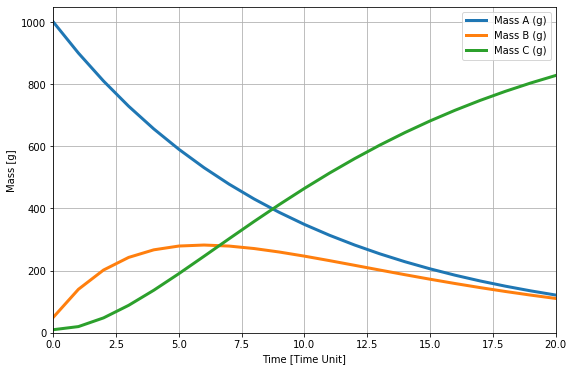

,Mass_A,Mass_B,Mass_C,Total Mass
0,1000.00,50.00,10.00,1060.0
1,900.00,140.00,20.00,1060.0
2,810.00,202.00,48.00,1060.0
3,729.00,242.60,88.40,1060.0
4,656.10,266.98,136.92,1060.0
5,590.49,279.19,190.32,1060.0
6,531.44,282.40,246.15,1060.0
7,478.30,279.07,302.64,1060.0
8,430.47,271.08,358.45,1060.0
9,387.42,259.91,412.67,1060.0


In [2]:
# Input 
n_simulation = 21 # choose the number of simulation
A_0 = 1000.0 # g, mass of A at t=0
B_0 = 50.0 # g, mass of B at t=0
C_0 = 10.0 # g, mass of C at t=0
R_A = 0.1 # g/a, decay rate for A
R_B = 0.2 # g/a, decay rate for B
time  = np.arange(n_simulation) # simulation time = number of simulation at 1 (time unit) interval

#initialization
A = np.zeros(n_simulation)
B = np.zeros(n_simulation)
C = np.zeros(n_simulation) 
A[0] = A_0 
B[0] = B_0
C[0] = C_0

# computation
for i in range(0,n_simulation-1):
    A[i+1] = A[i]-R_A*A[i]
    B[i+1] = B[i]+R_A*A[i]-R_B*B[i] 
    C[i+1] = C[i]+R_B*B[i]
    summ = A[i]+B[i]+C[i]  

# Output

d = {"Mass_A": A, "Mass_B": B, "Mass_C": C, "Total Mass": summ}
df = pd.DataFrame(d) # Generating result table
label = ["Mass A (g)", "Mass B (g)", "Mass C (g)"]
fig = plt.figure(figsize=(9,6))
plt.plot(time, A, time, B, time, C, linewidth=3);  # plotting the results
plt.xlabel("Time [Time Unit]"); plt.ylabel("Mass [g]") # placing axis labels
plt.legend(label, loc=0);plt.grid(); plt.xlim([0,20]); plt.ylim(bottom=0) # legends, grids, x,y limits
plt.show() # display plot
df.round(2) #display result table with 2 decimal places 

In [3]:
def mass_bal(n_simulation, MA, MB, MC, R_A, R_B):
    
    A = np.zeros(n_simulation)
    B = np.zeros(n_simulation)
    C = np.zeros(n_simulation) 
    
    for i in range(0,n_simulation-1):
        A[0] = MA
        B[0] = MB
        C[0] = MC
        A[i+1] = A[i]-R_A*A[i]
        B[i+1] = B[i]+R_A*A[i]-R_B*B[i] 
        C[i+1] = C[i]+R_B*B[i]
        summ = A[i]+B[i]+C[i]
        
    d = {"Mass_A": A, "Mass_B": B, "Mass_C": C, "Total Mass": summ}
    df = pd.DataFrame(d) # Generating result table
    label = ["Mass A (g)", "Mass B (g)", "Mass C (g)"]
    fig = plt.figure(figsize=(6,4))
    plt.plot(time, A, time, B, time, C, linewidth=3);  # plotting the results
    plt.xlabel("Time [Time Unit]"); plt.ylabel("Mass [g]") # placing axis labels
    plt.legend(label, loc=0);plt.grid(); plt.xlim([0,20]); plt.ylim(bottom=0) # legends, grids, x,y limits
    plt.show() # display plot
    
    return df.round(2) 

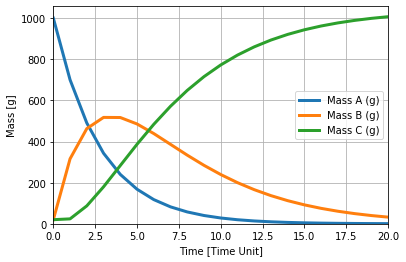

,Mass_A,Mass_B,Mass_C,Total Mass
0,1000.00,20.00,20.00,1040.0
1,700.00,316.00,24.00,1040.0
2,490.00,462.80,87.20,1040.0
3,343.00,517.24,179.76,1040.0
4,240.10,516.69,283.21,1040.0
5,168.07,485.38,386.55,1040.0
6,117.65,438.73,483.62,1040.0
7,82.35,386.28,571.37,1040.0
8,57.65,333.73,648.62,1040.0
9,40.35,284.28,715.37,1040.0


In [4]:
mass_bal(21,1000, 20, 20, 0.3, 0.2)